# Group Project of CS 210 Step:2

Seray Ayakta - 24219

Emin Kağan Öztemel - 23530

Recep Yerebakan - 23699

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from datetime import datetime

sns.set_style("darkgrid")

from os.path import join
from pprint import pprint

df1 = pd.read_csv('nypd-motor-vehicle-collisions.csv')
df2 = pd.read_csv('weather_description.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(df1.columns) #summarize columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')


In [6]:
print(df2.columns)  #summarize columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')


In [7]:
n1_rows, n1_columns = df1.shape  # get the shape of dataframe, .shape returns => rows and columns
print("number of rows: {}, number of columns: {}".format(n1_rows, n1_columns)) 

number of rows: 1483717, number of columns: 29


In [8]:
n2_rows, n2_columns = df2.shape  # get the shape of dataframe, .shape returns => rows and columns
print("number of rows: {}, number of columns: {}".format(n2_rows, n2_columns)) 

number of rows: 45253, number of columns: 37


In [9]:
df1.dtypes #types of columns

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [10]:
df2.dtypes #types of columns 

datetime             object
Vancouver            object
Portland             object
San Francisco        object
Seattle              object
Los Angeles          object
San Diego            object
Las Vegas            object
Phoenix              object
Albuquerque          object
Denver               object
San Antonio          object
Dallas               object
Houston              object
Kansas City          object
Minneapolis          object
Saint Louis          object
Chicago              object
Nashville            object
Indianapolis         object
Atlanta              object
Detroit              object
Jacksonville         object
Charlotte            object
Miami                object
Pittsburgh           object
Toronto              object
Philadelphia         object
New York             object
Montreal             object
Boston               object
Beersheba            object
Tel Aviv District    object
Eilat                object
Haifa                object
Nahariyya           

In [11]:
df1["weather"] = df2["New York"]  #CONNECT TWO DATAFRAMES TO EACH OTHER 

In [12]:
totalDeadandInjured=[]   # to get the total number who are suffered and add them into dataframe
sayi=0
for i in range (0,n1_rows):
    sayi = df1.iloc[i,10]+ df1.iloc[i,11]+df1.iloc[i,12]+df1.iloc[i,13]+df1.iloc[i,14]+df1.iloc[i,15]+df1.iloc[i,16]+df1.iloc[i,17]
    totalDeadandInjured.append(sayi)
df1["total"] = totalDeadandInjured

# Hypothesis Testing

Null Hypothesis: Wheater has no effect on the collision in NYC.

Alternative Hypothesis: The number of collision decreases when sky is clear.

In [13]:
test_type = "total"

SunnyDays = df1[df1["weather"] == "sky is clear"][test_type]  # Sky is clear 
NonSunnyDays = df1[(df1["weather"] != "sky is clear")&(df1["weather"] != "NaN")][test_type]       # Sky is not clear.

In [14]:
print("the mean of dead or injured people in sunny days{:.5f}".format(SunnyDays.mean()))

the mean of dead or injured people in sunny days0.53478


In [15]:
print("the mean of dead or injured people in non-sunny days{:.5f}".format(NonSunnyDays.mean()))

the mean of dead or injured people in non-sunny days0.52110


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


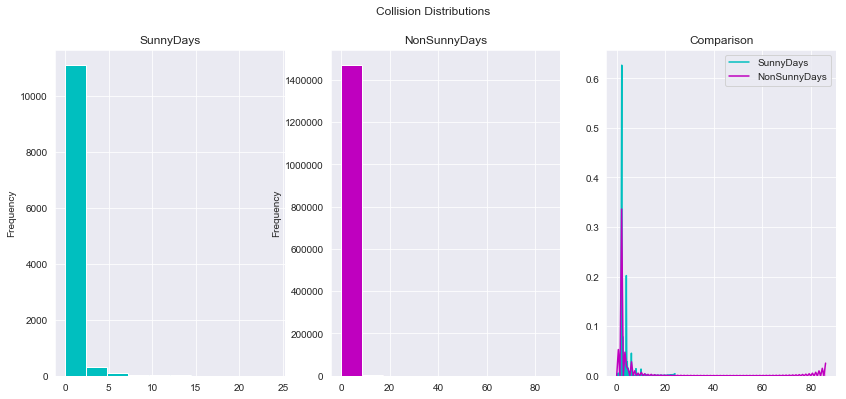

In [16]:
#The plot that shows the conditions seperately


fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
SunnyDays.plot(kind="hist", ax=ax[0], bins=10, label="SunnyDays", color="c")
ax[0].set_title("SunnyDays")

NonSunnyDays.plot(kind="hist", ax=ax[1], bins=10, label="NonSunnyDays", color="m")
ax[1].set_title("NonSunnyDays")

sns.kdeplot(SunnyDays, shade=True, label="SunnyDays", ax=ax[2], color="c")
sns.kdeplot(NonSunnyDays, shade=True, label="NonSunnyDays", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("Collision Distributions")
plt.show()

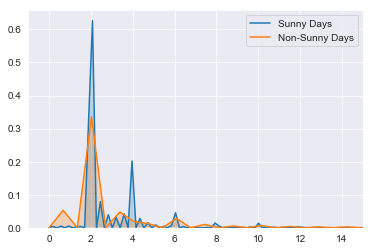

In [17]:
#The plot that shows the conditions together

ax = sns.kdeplot(SunnyDays.rename("Sunny Days"), shade=True)
sns.kdeplot(NonSunnyDays.rename("Non-Sunny Days"), ax=ax, shade=True)

plt.xlim([-1,15])
plt.show()

In [19]:
SunnyDays=SunnyDays.fillna(SunnyDays.mean())
NonSunnyDays=NonSunnyDays.fillna(NonSunnyDays.mean())

stats.ttest_ind(SunnyDays, NonSunnyDays, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=1.1155570584943886, pvalue=0.264634529862284)

In [ ]:
# We cannot reject the null hypothesis since the pvalue is greater than .05


In [21]:
from sklearn.model_selection import train_test_split


In [24]:
X = df1[['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']]
y = df1['NUMBER OF PERSONS KILLED']

X=X.fillna(X.mean())
y=y.fillna(y.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)



In [27]:
reg.score(X_train, y_train)


0.4942847736496285

In [28]:
reg.coef_


array([ 8.27794483e-05,  1.93575255e-03, -2.90749087e-04,  1.15497060e+00,
        1.00304002e+00])

In [29]:
reg.intercept_ 


0.0005123912699832391

In [30]:
reg.predict(X_test)

array([0.00051239, 0.00051239, 0.00051239, ..., 0.00051239, 0.00051239,
       0.00051239])